In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
DeviceNumArray = [610,853,850,848,855,852,36,1323]
StartDateArray = ['2023-02-06T04:39', '2023-02-08T05:10','2023-02-08T01:20','2023-02-19T00:10','2023-02-07T00:13','2023-02-05T02:30','2023-03-06T01:08','2023-02-06T23:00']
EndDateArray = ['2023-02-06T13:50','2023-02-08T17:35','2023-02-08T08:30','2023-02-19T08:00','2023-02-07T05:40','2023-02-05T12:50','2023-03-06T11:20','2023-02-07T09:00']
DfEarlyArray = []
DfMiddleArray = []
DfLaterArray = []
DfArray = []
DfMiddle2HourArray = []

nameArray = ['JW','MK','HW','JM','MW','CB','HE','HI']

StartDate = '20230204'
EndDate = '20230307'

stdValueArray = []

for i in range(0, len(DeviceNumArray)):
    # print(i)
    Url = 'http://52.231.67.67:3000/api/sensorData/duration?deviceNo='+str(DeviceNumArray[i])+'&startDate=' + StartDate + '&endDate=' + EndDate
    Df = pd.read_json(Url)

    startRow = Df.index[Df['regdate'].str.contains(StartDateArray[i])][0] #하루시작
    endRow = Df.index[Df['regdate'].str.contains(EndDateArray[i])][0] #하루끝
    Df = Df.sort_index(ascending=False)
    Df = Df.loc[startRow:endRow]
    if i == 6 :
        Df.to_excel("/Users/hyennaeon/Desktop/Hatinroo/HatinrooData/data.xlsx")
    Df = Df.loc[Df['hr'] != 0]
    Df = Df.reset_index(drop=True)
    Df = Df.loc[60:len(Df)-60]
    Df = Df.reset_index(drop=True)

    DfArray.append(Df)
    DfEarlyArray.append(Df.loc[0:60])
    DfMiddleArray.append(Df.loc[len(Df)/2 -30 : len(Df)/2 + 30])
    DfLaterArray.append(Df.loc[len(Df) - 60 : len(Df)])
    DfMiddle2HourArray.append(Df.loc[len(Df)/2 -60 : len(Df)/2 + 60])
    




In [4]:
for i in DfEarlyArray:
    pd.DataFrame(i).head()

In [4]:
colName = 'd2'

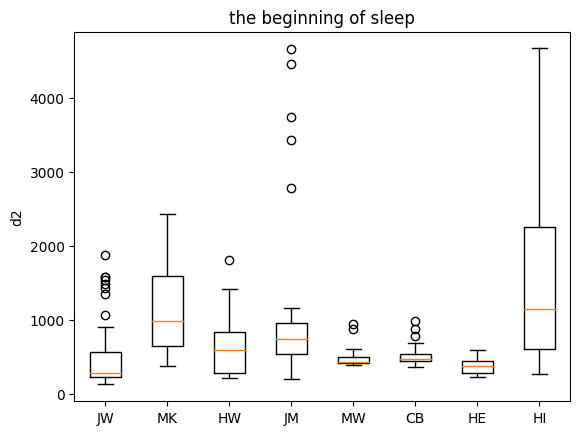

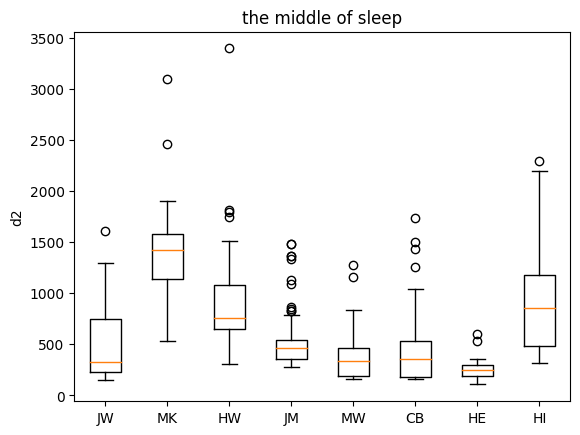

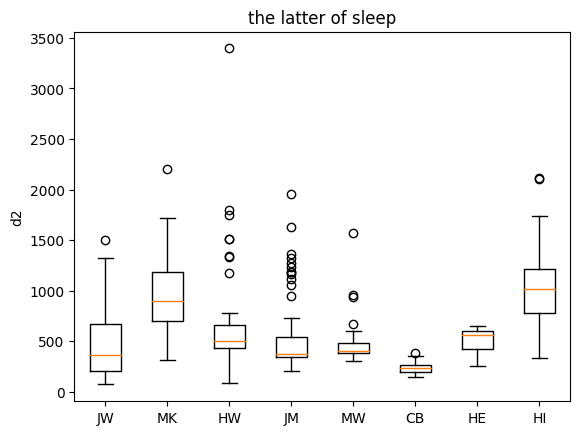

In [5]:
colArray = []
for i in DfEarlyArray:
    colArray.append(i[colName])


box = plt.boxplot(colArray)
plt.ylabel(colName)
plt.xticks([1,2,3,4,5,6,7,8],labels=[nameArray[0],nameArray[1],nameArray[2],nameArray[3],nameArray[4],nameArray[5],nameArray[6],nameArray[7]])
plt.title("the beginning of sleep")
plt.show()

colArray.clear()
for i in DfMiddleArray:
    colArray.append(i[colName])

plt.boxplot(colArray)
plt.ylabel(colName)
plt.xticks([1,2,3,4,5,6,7,8],labels=[nameArray[0],nameArray[1],nameArray[2],nameArray[3],nameArray[4],nameArray[5],nameArray[6],nameArray[7]])
plt.title("the middle of sleep")
plt.show()

colArray.clear()
for i in DfLaterArray:
    colArray.append(i[colName])

plt.boxplot(colArray)
plt.ylabel(colName)
plt.xticks([1,2,3,4,5,6,7,8],labels=[nameArray[0],nameArray[1],nameArray[2],nameArray[3],nameArray[4],nameArray[5],nameArray[6],nameArray[7]])
plt.title("the latter of sleep")
plt.show()

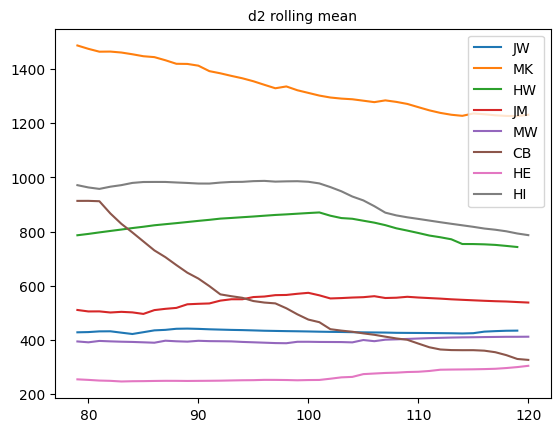

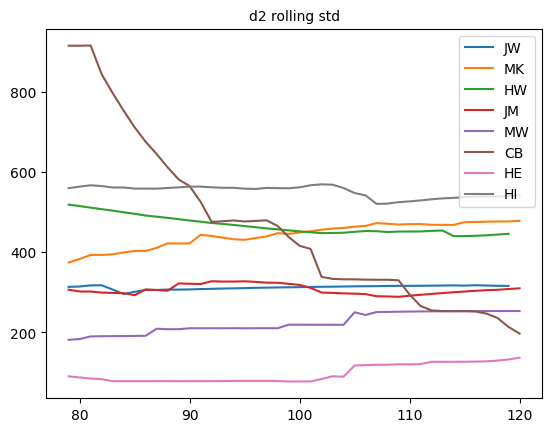

In [6]:
#슬라이딩 윈도우로 평균 구하기
window = 80
rollingDfArray_mean = []
for i in DfMiddle2HourArray:
    i = pd.DataFrame(i).reset_index(drop=True)
    rollingDfArray_mean.append(pd.DataFrame(i[colName]).rolling(window= window).mean())

 #슬라이딩 윈도우로 표준편차 구하기
rollingDfArray_std = []
for i in DfMiddle2HourArray:
    i = pd.DataFrame(i).reset_index(drop=True)
    rollingDfArray_std.append(pd.DataFrame(i[colName]).rolling(window= window).std())

plt.title(colName+' rolling mean',fontsize=10)
# for i in range(7):
#     plt.plot(rollingDfArray_mean[i)
plt.plot(rollingDfArray_mean[0],label=nameArray[0])
plt.plot(rollingDfArray_mean[1],label=nameArray[1])
plt.plot(rollingDfArray_mean[2],label=nameArray[2])
plt.plot(rollingDfArray_mean[3],label=nameArray[3])
plt.plot(rollingDfArray_mean[4],label=nameArray[4])
plt.plot(rollingDfArray_mean[5],label=nameArray[5])
plt.plot(rollingDfArray_mean[6],label=nameArray[6])
plt.plot(rollingDfArray_mean[7],label=nameArray[7])
plt.legend()
plt.show()

plt.title(colName+' rolling std',fontsize=10)
plt.plot(rollingDfArray_std[0],label=nameArray[0])
plt.plot(rollingDfArray_std[1],label=nameArray[1])
plt.plot(rollingDfArray_std[2],label=nameArray[2])
plt.plot(rollingDfArray_std[3],label=nameArray[3])
plt.plot(rollingDfArray_std[4],label=nameArray[4])
plt.plot(rollingDfArray_std[5],label=nameArray[5])
plt.plot(rollingDfArray_std[6],label=nameArray[6])
plt.plot(rollingDfArray_std[7],label=nameArray[7])
plt.legend()
plt.show()